# Orbital Cycles

In this document ...

In [1]:
# import header

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import climlab
from climlab.model.ebm import EBM_seasonal
from climlab.solar.orbital_cycles import OrbitalCycles
from climlab.surface.albedo import StepFunctionAlbedo
from climlab.domain.field import global_mean

### Model Creation

An EBM model instance is created through

In [2]:
# model creation
ebm_model = EBM_seasonal(A=204, B=2.17, D=0.79, a0=0.3, a2 = 0.01, ai=0.6, Tf=-2)

The model is set up with an albedo feedback subprocess:

In [3]:
# print model states and suprocesses
print ebm_model

climlab Process of type <class 'climlab.model.ebm.EBM_seasonal'>. 
State variables and domain shapes: 
  Ts: (90, 1) 
The subprocess tree: 
top: <class 'climlab.model.ebm.EBM_seasonal'>
   diffusion: <class 'climlab.dynamics.diffusion.MeridionalDiffusion'>
   LW: <class 'climlab.radiation.AplusBT.AplusBT'>
   albedo: <class 'climlab.surface.albedo.StepFunctionAlbedo'>
      iceline: <class 'climlab.surface.albedo.Iceline'>
      cold_albedo: <class 'climlab.surface.albedo.ConstantAlbedo'>
      warm_albedo: <class 'climlab.surface.albedo.P2Albedo'>
   insolation: <class 'climlab.radiation.insolation.DailyInsolation'>



### Test Run

In [4]:
ebm_model.integrate_converge()

global_mean(ebm_model.timeave['Ts'])

Total elapsed time is 9.0 years.


Field(10.695892552075234)

In [5]:
ebm_model.diagnostics['icelat']

array([-60.,  52.])

In [6]:
ebm_model.time

{'day_of_year_index': 0,
 'days_elapsed': 3287.179799999966,
 'days_of_year': array([   0.        ,    4.05824667,    8.11649333,   12.17474   ,
          16.23298667,   20.29123333,   24.34948   ,   28.40772667,
          32.46597333,   36.52422   ,   40.58246667,   44.64071333,
          48.69896   ,   52.75720667,   56.81545333,   60.8737    ,
          64.93194667,   68.99019333,   73.04844   ,   77.10668667,
          81.16493333,   85.22318   ,   89.28142667,   93.33967333,
          97.39792   ,  101.45616667,  105.51441333,  109.57266   ,
         113.63090667,  117.68915333,  121.7474    ,  125.80564667,
         129.86389333,  133.92214   ,  137.98038667,  142.03863333,
         146.09688   ,  150.15512667,  154.21337333,  158.27162   ,
         162.32986667,  166.38811333,  170.44636   ,  174.50460667,
         178.56285333,  182.6211    ,  186.67934667,  190.73759333,
         194.79584   ,  198.85408667,  202.91233333,  206.97058   ,
         211.02882667,  215.08707333,  

## Orbital Cycle Routine

The model integration through a different set of orbital parameters is done by a function called ``OrbitalCycles`` from the `climlab.solar.orbital_cycles` module.

We want to integrate the model for orbital parameters from the last 5,000 years. To save computation time we speed up the process by the factor 10.

## Start the integration

In [7]:
#  run for 5,000 orbital years, but only 500 model years
experiment = OrbitalCycles(ebm_model, kyear_start=-23, kyear_stop=-10, segment_length_years=10., orbital_year_factor=100.)

---------  OrbitalCycles  START ----------
Beginning integration for the model from -23 to -10 kyears before present.
Integration time for each set of orbital parameters is 10.0 years.
Orbital cycles will be sped up by a factor 100.0
Total number of segments is 13
Loading Berger and Loutre (1991) orbital parameter data from file /home/moritz/anaconda2/envs/climlab_0.3_env/lib/python2.7/site-packages/climlab/solar/orbit91
-------------------------
Segment 0 out of 13
Using orbital parameters from -23 kyears before present.
Global mean temperature from the final year of integration is 10.8922858558 degrees C.
-------------------------
Segment 1 out of 13
Using orbital parameters from -22.0 kyears before present.
Global mean temperature from the final year of integration is 10.8914821979 degrees C.
-------------------------
Segment 2 out of 13
Using orbital parameters from -21.0 kyears before present.
Global mean temperature from the final year of integration is 10.8467065845 degrees C.
-

In [8]:
ebm_model.time

{'day_of_year_index': 0,
 'days_elapsed': 50768.66580000745,
 'days_of_year': array([   0.        ,    4.05824667,    8.11649333,   12.17474   ,
          16.23298667,   20.29123333,   24.34948   ,   28.40772667,
          32.46597333,   36.52422   ,   40.58246667,   44.64071333,
          48.69896   ,   52.75720667,   56.81545333,   60.8737    ,
          64.93194667,   68.99019333,   73.04844   ,   77.10668667,
          81.16493333,   85.22318   ,   89.28142667,   93.33967333,
          97.39792   ,  101.45616667,  105.51441333,  109.57266   ,
         113.63090667,  117.68915333,  121.7474    ,  125.80564667,
         129.86389333,  133.92214   ,  137.98038667,  142.03863333,
         146.09688   ,  150.15512667,  154.21337333,  158.27162   ,
         162.32986667,  166.38811333,  170.44636   ,  174.50460667,
         178.56285333,  182.6211    ,  186.67934667,  190.73759333,
         194.79584   ,  198.85408667,  202.91233333,  206.97058   ,
         211.02882667,  215.08707333,  

### Orbital Table

In [9]:
from climlab.solar.orbital import OrbitalTable

In [32]:
kyears = np.arange(-50,0,0.1)
table = OrbitalTable()
orb = table.lookup_parameters(kyears)

Loading Berger and Loutre (1991) orbital parameter data from file /home/moritz/anaconda2/envs/climlab_0.3_env/lib/python2.7/site-packages/climlab/solar/orbit91


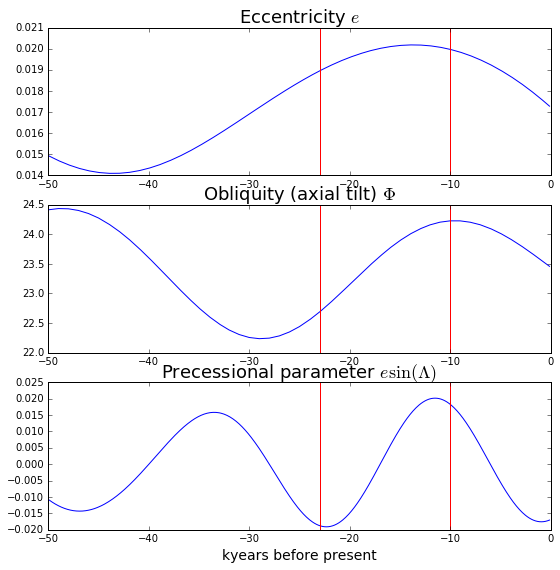

In [43]:
fig = plt.figure( figsize = (9,9) )
ax1 = fig.add_subplot(311)
ax1.plot(kyears, orb['ecc'])
ax1.axvline(-23,color='r')
ax1.axvline(-10,color='r')
ax1.set_title('Eccentricity $e$', fontsize=18 )


ax2 = fig.add_subplot(312)
ax2.plot(kyears, orb['obliquity'])
ax2.axvline(-23,color='r')
ax2.axvline(-10,color='r')
ax2.set_title('Obliquity (axial tilt) $\Phi$', fontsize=18 )

ax3 = fig.add_subplot(313)
ax3.plot(kyears, orb['ecc'] * np.sin( np.deg2rad( orb['long_peri'])))
ax3.axvline(-23,color='r')
ax3.axvline(-10,color='r')
ax3.set_title('Precessional parameter $e \sin(\Lambda)$', fontsize=18 )
ax3.set_xlabel( 'kyears before present', fontsize=14 )

In [12]:
experiment.T_segments_annual[45,:]
#experiment.orb_kyear
#experiment.kyear_start
#experiment.segment_length_years * experiment.orbital_year_factor /1000.

array([ 21.44130362,  21.41453074,  21.35301444,  21.30861506,
        21.17633305,  21.17104497,  21.08137198,  20.99880634,
        20.9587408 ,  20.99336685,  20.95220832,  20.90622809,  20.83580519])

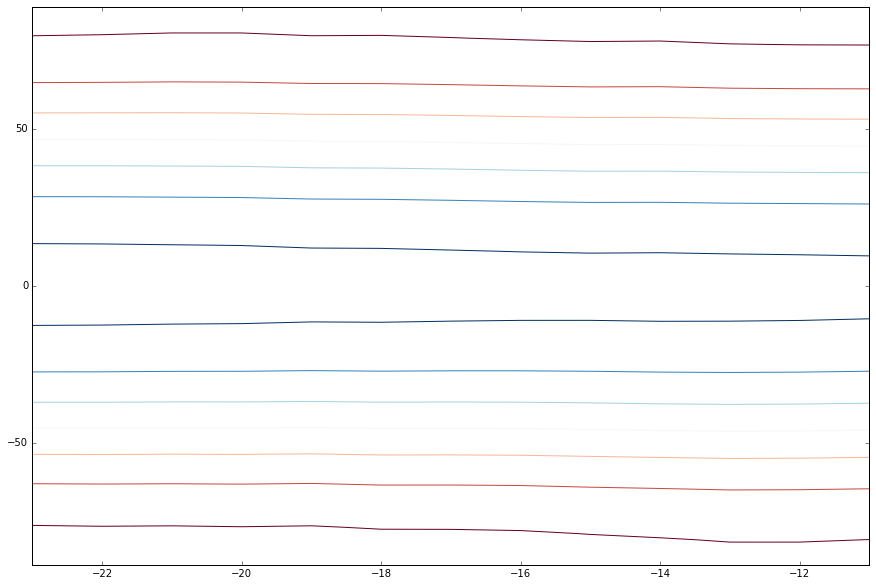

In [13]:
#import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D

# creating plot figure
fig = plt.figure(figsize=(15,10))

lat      = ebm_model.lat

start    = experiment.kyear_start
stop     = experiment.kyear_stop
interval = experiment.segment_length_years * experiment.orbital_year_factor / 1000.
time     = np.arange(start, stop, interval)

# Temperature plot
ax1 = fig.add_subplot(111)
ax1.contour( time, lat, experiment.T_segments_annual,  cmap='RdBu')

#ax1.set_xticks([-90,-60,-30,0,30,60,90])
#ax1.set_xlim([-90,90])
#ax1.set_xlabel('latitude')
#ax1.set_ylabel('surface temperature (degC)')
#ax1.grid()



plt.show()